### Slope non ditch amplification normalize
In here also Claude was used to resolve the Dask problem.

Note: from folder "Functions" in 02_Analysis/01_Scripts it is possibleto chech out with the function name what is used in the end. 

In [1]:
import numpy as np
import pandas as pd
import dask.array as da
from numba import jit
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, uniform_filter # Clauden ehdotuksesta
from Functions.general_functions import create_circular_mask

### Statistics from slope

In [24]:
import numpy as np
import os

features_path = "../../01_Data/01_Raw/features/features"

def print_slope_statistics(zone_numbers=range(1, 22)):
    """
    Load slope data from numpy files and print statistics for each zone.
    """
    for zone_number in zone_numbers:
        try:
            # Load the slope data
            slope_file_path = f"{features_path}/slope_{zone_number}.npy"
            if not os.path.exists(slope_file_path):
                print(f"File for Zone {zone_number} does not exist.")
                continue
                
            slope = np.load(slope_file_path)
            print(f"Zone {zone_number}: Shape of original slope: {slope.shape}")
            
            # Calculate and print statistics
            mean_val = np.mean(slope)
            median_val = np.median(slope)
            std_val = np.std(slope)
            min_val = np.min(slope)
            max_val = np.max(slope)
            
            print(f"Zone {zone_number} statistics:")
            print(f"  Mean: {mean_val:.2f}")
            print(f"  Median: {median_val:.2f}")
            print(f"  Standard Deviation: {std_val:.2f}")
            print(f"  Min: {min_val:.2f}")
            print(f"  Max: {max_val:.2f}")
            print("-" * 40)
        
        except Exception as e:
            print(f"Error processing Zone {zone_number}: {str(e)}")

# Execute the function to print statistics for each slope file
print_slope_statistics(zone_numbers=range(1, 22))  # Adjust the range as needed


Zone 1: Shape of original slope: (5000, 5000)
Zone 1 statistics:
  Mean: 8.98
  Median: 5.43
  Standard Deviation: 10.54
  Min: 0.00
  Max: 73.37
----------------------------------------
Zone 2: Shape of original slope: (5000, 5000)
Zone 2 statistics:
  Mean: 8.12
  Median: 5.08
  Standard Deviation: 9.40
  Min: 0.00
  Max: 75.47
----------------------------------------
Zone 3: Shape of original slope: (5000, 5000)
Zone 3 statistics:
  Mean: 8.19
  Median: 4.80
  Standard Deviation: 9.80
  Min: 0.00
  Max: 80.10
----------------------------------------
Zone 4: Shape of original slope: (5000, 5000)
Zone 4 statistics:
  Mean: 9.23
  Median: 5.37
  Standard Deviation: 10.99
  Min: 0.00
  Max: 78.40
----------------------------------------
Zone 5: Shape of original slope: (5000, 5000)
Zone 5 statistics:
  Mean: 7.87
  Median: 4.75
  Standard Deviation: 9.30
  Min: 0.00
  Max: 73.21
----------------------------------------
Zone 6: Shape of original slope: (5000, 5000)
Zone 6 statistics:
  M

#### View Slope
Original code brought a DASK problem. This was the way I got it working.

In [4]:
features_path = "../../01_Data/01_Raw/features/features"

In [6]:
import numpy as np
from scipy.ndimage import gaussian_filter
from numba import jit

# Internal normalization function (for reclassification)
def _slope_non_ditch_amplification_normalize(arr):
    """
    Internal non-ditch amplification reclassification for Slope.
    This function will process the array and return a normalized value based on conditions.
    """
    new_arr = np.zeros_like(arr)  # Initialize the new array with zeros of the same shape
    
    # Apply reclassification based on conditions
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i][j] < 8:
                new_arr[i][j] = 0
            elif arr[i][j] < 9:
                new_arr[i][j] = 20
            elif arr[i][j] < 10:
                new_arr[i][j] = 25
            elif arr[i][j] < 11:
                new_arr[i][j] = 30
            elif arr[i][j] < 13:
                new_arr[i][j] = 34
            elif arr[i][j] < 15:
                new_arr[i][j] = 38
            elif arr[i][j] < 17:
                new_arr[i][j] = 42
            elif arr[i][j] < 19:
                new_arr[i][j] = 46
            elif arr[i][j] < 21:
                new_arr[i][j] = 50
            else:
                new_arr[i][j] = 55
    return new_arr

from scipy.ndimage import median_filter

def slope_non_ditch_amplification(arr):
    """
    Non-ditch amplification from Slope.
    This version processes the array using a median filter and applies reclassification.
    """
    # Apply the median filter using a circular mask of radius 35
    arr_filtered = median_filter(arr, size=(35, 35), mode='reflect')

    # Normalize the array using the internal normalization function
    new_arr = _slope_non_ditch_amplification_normalize(arr_filtered)
    
    # Return the processed 2D array for visualization or further use
    return new_arr


Zone 9: Shape of original slope: (5000, 5000)
Zone 9: Shape of processed slope: (5000, 5000)


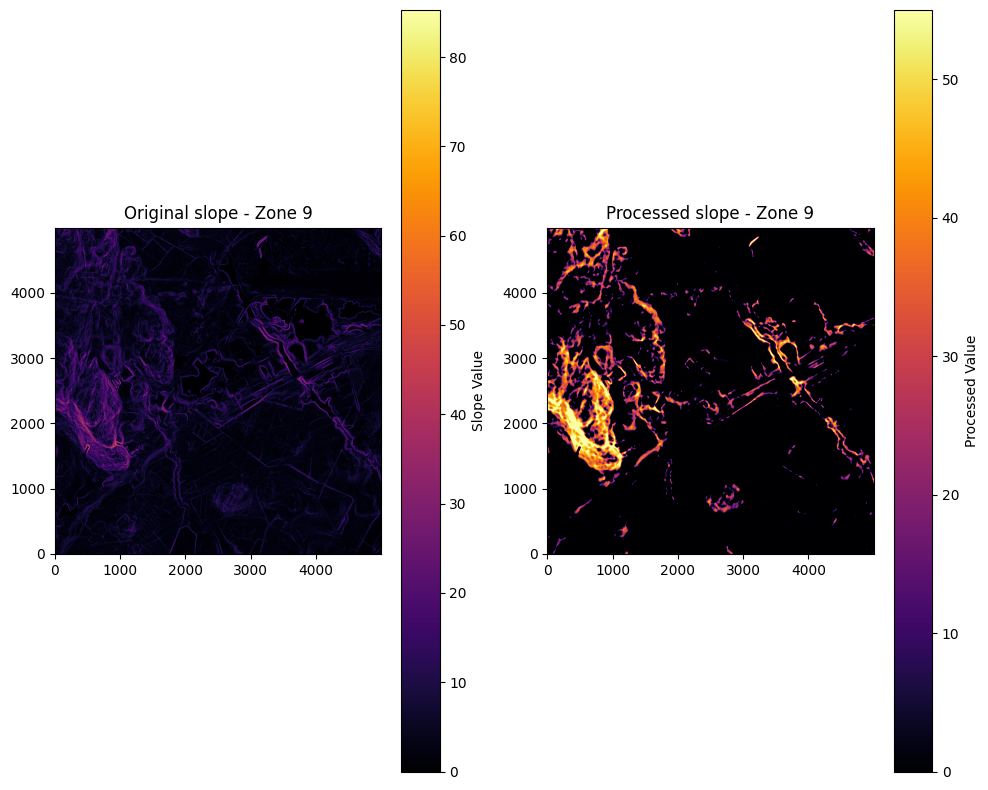

Processed slope values (first 5 rows):   zone_number original_shape processed_shape
0           9   (5000, 5000)    (5000, 5000)


In [7]:
def slope_non_ditch_amplification_create(zone_numbers=range(9, 10)):
    """
    Loads raw slope data, processes it using reclassification,
    and creates a list of normalized values for all zones.
    """
    data_frame = pd.DataFrame(columns=["zone_number", "original_shape", "processed_shape"])

    for zone_number in zone_numbers:
        # Load the slope data (this assumes you have the `.npy` files)
        slope = np.load(f"{features_path}/slope_{zone_number}.npy").astype(np.float64)
        print(f"Zone {zone_number}: Shape of original slope: {slope.shape}")

        # Process the slope data using the non-ditch amplification method
        slope_processed = slope_non_ditch_amplification(slope)
        print(f"Zone {zone_number}: Shape of processed slope: {slope_processed.shape}")

        # Update the DataFrame with shape information
        data_frame = pd.concat([data_frame, pd.DataFrame([{
            "zone_number": zone_number,
            "original_shape": slope.shape,
            "processed_shape": slope_processed.shape
        }])], ignore_index=True)

        # Visualize the original and processed data
        plt.figure(figsize=(10, 8))

        # Plot the original slope data
        plt.subplot(1, 2, 1)
        plt.imshow(slope, cmap='inferno', origin='lower')
        plt.title(f"Original slope - Zone {zone_number}")
        plt.colorbar(label="Slope Value")

        # Plot the processed slope data
        if slope_processed.ndim == 2:  # Ensure it's a 2D array for plotting
            plt.subplot(1, 2, 2)
            plt.imshow(slope_processed, cmap='inferno', origin='lower')
            plt.title(f"Processed slope - Zone {zone_number}")
            plt.colorbar(label="Processed Value")
        else:
            print(f"Warning: Processed slope for Zone {zone_number} is not a 2D array!")

        plt.tight_layout()
        plt.show()

    return data_frame  # Return the complete list of values

# Execute the processing and get the final list of values
processed_values = slope_non_ditch_amplification_create()
print(f"Processed slope values (first 5 rows): {processed_values.head()}")

## Dask optimising test

In [20]:
import numpy as np
import pandas as pd
import dask.array as da
from numba import jit
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, uniform_filter # Clauden ehdotuksesta
from Functions.general_functions import create_circular_mask
from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

### Code test1
Used. 

In [46]:
def _slope_stream_ditch_classification(arr):
    """
    Optimized slope classification for identifying streams and ditches.
    Uses more granular classification in low slopes where streams/ditches typically occur.
    """
    conditions = [
        (arr < 2),           # Very flat areas - potential water accumulation
        (arr >= 2) & (arr < 5),    # Gentle slopes - common for streams
        (arr >= 5) & (arr < 8),    # Mild slopes - potential drainage channels
        (arr >= 8) & (arr < 12),   # Moderate slopes - possible ephemeral streams
        (arr >= 12) & (arr < 15),  # Steeper channels
        (arr >= 15) & (arr < 20),  # Steep terrain features
        (arr >= 20) & (arr < 30),  # Very steep terrain
        (arr >= 30) & (arr < 45),  # Extreme slopes
        (arr >= 45)                # Near-vertical features
    ]
    
    # Values optimized for stream/ditch detection
    values = [1, 3, 6, 10, 13, 17, 25, 35, 45]
    
    result = da.zeros_like(arr)
    for cond, value in zip(conditions, values):
        result = da.where(cond, value, result)
    
    return result

def process_slope_for_channels(arr, chunk_size=(1000, 1000), filter_size=15):
    """
    Process slope data to enhance stream and ditch features.
    
    Parameters:
    - arr: Input slope array
    - chunk_size: Dask chunk size for parallel processing
    - filter_size: Size of median filter window (smaller = more detail)
    """
    arr_dask = da.from_array(arr, chunks=chunk_size)
    
    # Apply smaller median filter to preserve narrow features
    arr_filtered = arr_dask.map_blocks(
        lambda block: median_filter(block, size=(filter_size, filter_size), mode='reflect'),
        dtype=arr_dask.dtype
    )
    
    # Classify slopes
    classified = _slope_stream_ditch_classification(arr_filtered)
    
    return classified

Included.

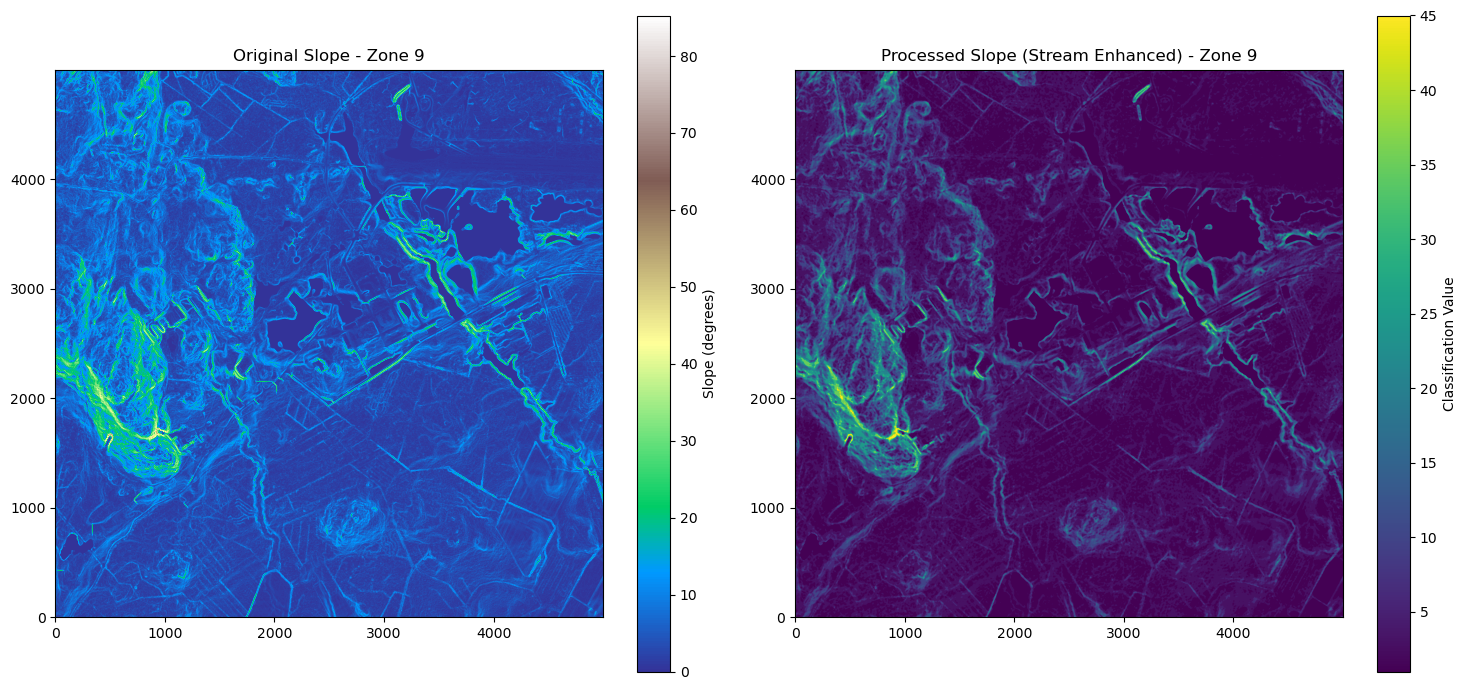

Analysis complete. Summary:
   zone_number original_shape processed_shape  min_slope  max_slope  \
0            9   (5000, 5000)    (5000, 5000)        0.0  85.265373   

   mean_slope  
0    4.977932  


In [48]:
def visualize_channels(original_slope, processed_slope, zone_number):
    """
    Create enhanced visualization for stream and ditch features.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    
    # Original slope with appropriate colormap
    im1 = ax1.imshow(original_slope, cmap='terrain', origin='lower')
    ax1.set_title(f"Original Slope - Zone {zone_number}")
    plt.colorbar(im1, ax=ax1, label="Slope (degrees)")
    
    # Processed slope with colormap optimized for stream visibility
    im2 = ax2.imshow(processed_slope, cmap='viridis', origin='lower')
    ax2.set_title(f"Processed Slope (Stream Enhanced) - Zone {zone_number}")
    plt.colorbar(im2, ax=ax2, label="Classification Value")
    
    plt.tight_layout()
    return fig

def analyze_slope_channels(zone_numbers=range(9, 10), chunk_size=(1000, 1000), features_path=""):
    """
    Main function to analyze slope data for stream and ditch identification.
    """
    results = []
    
    for zone_number in zone_numbers:
        # Load slope data
        slope = np.load(f"{features_path}/slope_{zone_number}.npy").astype(np.float64)
        
        # Process slope data
        processed = process_slope_for_channels(slope, chunk_size=chunk_size)
        slope_processed = processed.compute()
        
        # Create visualization
        fig = visualize_channels(slope, slope_processed, zone_number)
        plt.show()
        
        # Store results
        results.append({
            "zone_number": zone_number,
            "original_shape": slope.shape,
            "processed_shape": slope_processed.shape,
            "min_slope": np.min(slope),
            "max_slope": np.max(slope),
            "mean_slope": np.mean(slope)
        })
    
    return pd.DataFrame(results)

if __name__ == "__main__":
    features_path = "../../01_Data/01_Raw/features/features"
    results_df = analyze_slope_channels(features_path=features_path)
    print("Analysis complete. Summary:")
    print(results_df)

### Code test 2

In [44]:
def _slope_ditch_amplification_normalize_dask(arr):
    """
    Internal non-ditch amplification reclassification for Slope, optimized for Dask.
    This function applies a vectorized operation to normalize the array based on conditions.
    """
    # Define the conditions and their corresponding values
    conditions = [
        (arr < 5),
        (arr >= 13) & (arr < 15),
        (arr >= 15) & (arr < 20),
        (arr >= 25) & (arr < 30),
        (arr >= 35) & (arr < 40),
        (arr >= 45) & (arr < 50),
        (arr >= 50) & (arr < 55),
        (arr >= 55) & (arr < 60),
        (arr >= 60) & (arr < 65),
        (arr >= 65),
    ]
    values = [5, 9, 15, 25, 35, 45, 50, 55, 60, 65]

    # Use dask's where functionality to apply conditions
    result = da.zeros_like(arr)
    for cond, value in zip(conditions, values):
        result = da.where(cond, value, result)

    return result


def slope_non_ditch_amplification_dask(arr, chunk_size=(1000, 1000)):
    """
    Non-ditch amplification from Slope, optimized for Dask.
    Processes the array using a median filter and applies reclassification.
    """
    # Convert the input array to a Dask array with specified chunk size
    arr_dask = da.from_array(arr, chunks=chunk_size)

    # Apply the median filter using a circular mask of radius 35
    # Note: Dask does not directly support scipy's median filter, so apply it in a delayed manner
    arr_filtered = arr_dask.map_blocks(
        lambda block: median_filter(block, size=(35, 35), mode='reflect'),
        dtype=arr_dask.dtype,
    )

    # Normalize the array using the internal normalization function
    new_arr = _slope_ditch_amplification_normalize_dask(arr_filtered)

    # Return the processed Dask array
    return new_arr


# Example usage
if __name__ == "__main__":
    # Create a large random array for testing
    input_array = np.random.uniform(0, 25, size=(5000, 5000))

    # Process the array using the optimized Dask function
    result = _slope_ditch_amplification_normalize_dask(input_array)

    # Trigger computation and retrieve the result as a NumPy array
    output_array = result.compute()

    print("Processing complete.")


Processing complete.


Zone 2: Shape of original slope: (5000, 5000)
Zone 2: Shape of processed slope: (5000, 5000)


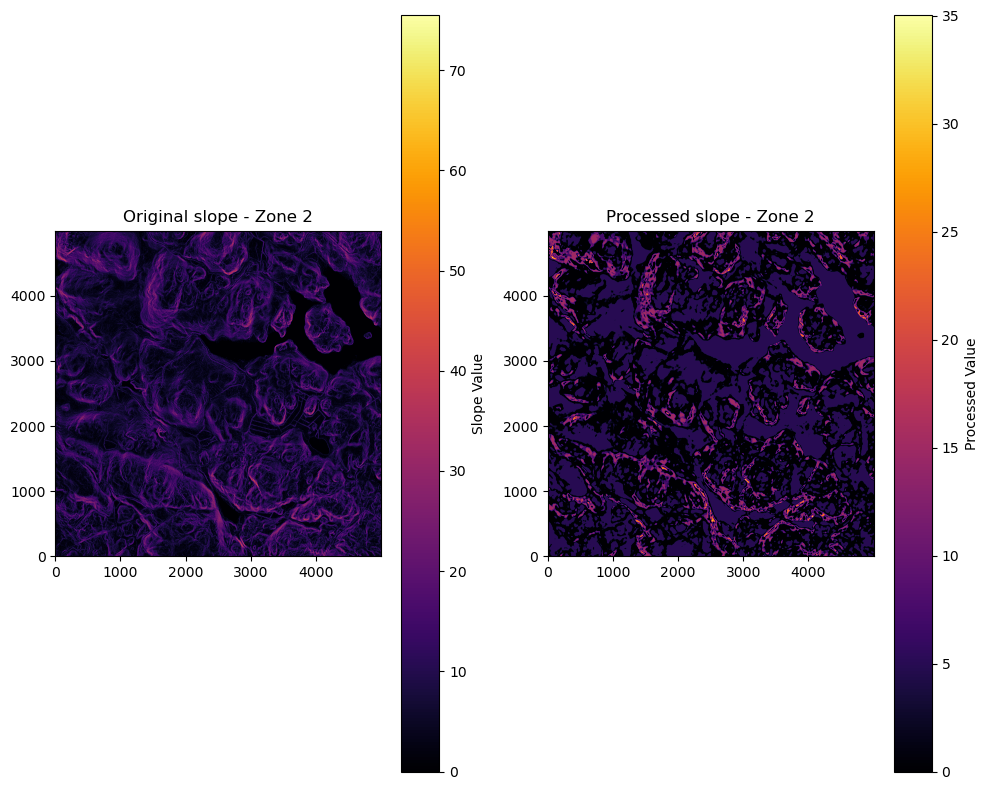

Processed slope values (first 5 rows):   zone_number original_shape processed_shape
0           2   (5000, 5000)    (5000, 5000)


In [45]:
def slope_ditch_amplification_create(zone_numbers=range(2, 3), chunk_size=(1000, 1000)):
    """
    Loads raw slope data, processes it using Dask-based reclassification,
    and creates plots of normalized values for all zones.
    """
    data_frame = pd.DataFrame(columns=["zone_number", "original_shape", "processed_shape"])

    for zone_number in zone_numbers:
        # Load the slope data (this assumes you have the `.npy` files)
        slope = np.load(f"{features_path}/slope_{zone_number}.npy").astype(np.float64)
        print(f"Zone {zone_number}: Shape of original slope: {slope.shape}")

        # Process the slope data using the Dask-based non-ditch amplification method
        slope_processed_dask = slope_non_ditch_amplification_dask(slope, chunk_size=chunk_size)
        slope_processed = slope_processed_dask.compute()  # Convert Dask array to NumPy array
        print(f"Zone {zone_number}: Shape of processed slope: {slope_processed.shape}")

        # Update the DataFrame with shape information
        data_frame = pd.concat([data_frame, pd.DataFrame([{
            "zone_number": zone_number,
            "original_shape": slope.shape,
            "processed_shape": slope_processed.shape
        }])], ignore_index=True)

        # Visualize the original and processed data
        plt.figure(figsize=(10, 8))

        # Plot the original slope data
        plt.subplot(1, 2, 1)
        plt.imshow(slope, cmap='inferno', origin='lower')
        plt.title(f"Original slope - Zone {zone_number}")
        plt.colorbar(label="Slope Value")

        # Plot the processed slope data
        plt.subplot(1, 2, 2)
        plt.imshow(slope_processed, cmap='inferno', origin='lower')
        plt.title(f"Processed slope - Zone {zone_number}")
        plt.colorbar(label="Processed Value")

        plt.tight_layout()
        plt.show()

    return data_frame  # Return the complete list of values


# Execute the processing and get the final list of values
if __name__ == "__main__":
    # Define the path to the feature files
    features_path = "../../01_Data/01_Raw/features/features"  # Update this to the correct path

    processed_values = slope_ditch_amplification_create()
    print(f"Processed slope values (first 5 rows): {processed_values.head()}")
